<a href="https://colab.research.google.com/github/juan026/EVA3D/blob/main/ComputerGraphics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# @title Setup Everything

!nvidia-smi
!git clone https://github.com/juan026/EVA3D.git

!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
!pip install -r EVA3D/requirements.txt

Tue Apr 25 07:22:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# @title Download Models
%cd EVA3D
from download_models import download_pretrained_models
download_pretrained_models()

/content/EVA3D


100%|██████████| 160M/160M [00:01<00:00, 99.2MB/s]


100%|██████████| 160M/160M [00:03<00:00, 40.6MB/s]


100%|██████████| 160M/160M [00:01<00:00, 112MB/s]


100%|██████████| 158M/158M [00:01<00:00, 144MB/s]


Register and download SMPL models [here](https://smpl.is.tue.mpg.de/). Put the downloaded models in the folder smpl_models. Only the neutral one is needed. The folder structure should look like

```
./
├── ...
└── smpl_models/
    ├── smpl/
        └── SMPL_NEUTRAL.pkl
```

In [5]:
# @title Download SMPL NEUTRAL model
!ls

!mkdir smpl_models
%cd smpl_models
!mkdir smpl
%cd smpl
!ls
!gdown 1DTiAXbVnCRopZ-LObAqKnT-9rv-aySc5
!ls

assets				eva3d_aist.py	      README.md
augment.py			eva3d_deepfashion.py  requirements.txt
calculate_fid.py		generation_demo.py    scripts
checkpoint			LICENSE		      smpl_utils.py
ComputerGraphics_Project.ipynb	losses.py	      torch_utils
dataset.py			model.py	      train_deepfashion.py
distributed.py			notebook	      utils.py
dnnlib				op		      volume_renderer.py
download_datasets.py		options.py
download_models.py		__pycache__
/content/EVA3D/smpl_models
/content/EVA3D/smpl_models/smpl
Downloading...
From: https://drive.google.com/uc?id=1DTiAXbVnCRopZ-LObAqKnT-9rv-aySc5
To: /content/EVA3D/smpl_models/smpl/SMPL_NEUTRAL.pkl
100% 39.0M/39.0M [00:00<00:00, 111MB/s]
SMPL_NEUTRAL.pkl


In [6]:
# @title Download dataset for training
%cd ../..
!ls
!python download_datasets.py

Streaming output truncated to the last 5000 lines.
  inflating: datasets/DeepFashion/images/WOMEN-Dresses-id_00000481-03_4_full.png  
  inflating: datasets/DeepFashion/images/MEN-Jackets_Vests-id_00004606-01_4_full.png  
  inflating: datasets/DeepFashion/images/WOMEN-Dresses-id_00002682-03_1_front.png  
  inflating: datasets/DeepFashion/images/WOMEN-Dresses-id_00004354-02_2_side.png  
  inflating: datasets/DeepFashion/images/WOMEN-Tees_Tanks-id_00000212-01_4_full.png  
  inflating: datasets/DeepFashion/images/WOMEN-Pants-id_00004070-05_1_front.png  
  inflating: datasets/DeepFashion/images/WOMEN-Sweaters-id_00003632-04_4_full.png  
  inflating: datasets/DeepFashion/images/MEN-Sweatshirts_Hoodies-id_00006478-01_4_full.png  
  inflating: datasets/DeepFashion/images/WOMEN-Blouses_Shirts-id_00000727-04_7_additional.png  
  inflating: datasets/DeepFashion/images/MEN-Sweatshirts_Hoodies-id_00002533-01_4_full.png  
  inflating: datasets/DeepFashion/images/WOMEN-Blouses_Shirts-id_00004111-06_7

In [23]:
from IPython.display import Image

Image('evaluations/512x256_deepfashion/iter_0420000/random_angles/images_paper_fig/0000000.png')
import os

root_dataset = "/content/EVA3D/datasets/DeepFashion/images/"

testing_images= ["MEN-Jackets_Vests-id_00005346-01_4_full.png",
                 "WOMEN-Dresses-id_00006993-03_7_additional.png",
                 "WOMEN-Tees_Tanks-id_00007918-05_4_full.png"]



#for im in testing_images:
  #print(os.path.join(root_dataset, im))
  

In [38]:
# define images for evaluation
root_dataset = "/content/EVA3D/datasets/DeepFashion/images/"

testing_images= ["MEN-Jackets_Vests-id_00005346-01_4_full.png",
                 "WOMEN-Dresses-id_00006993-03_7_additional.png",
                 "WOMEN-Tees_Tanks-id_00007918-05_4_full.png"]


img_testing1 = os.path.join(root_dataset, testing_images[0])
img_testing2 = os.path.join(root_dataset, testing_images[1])
img_testing3 = os.path.join(root_dataset, testing_images[2])

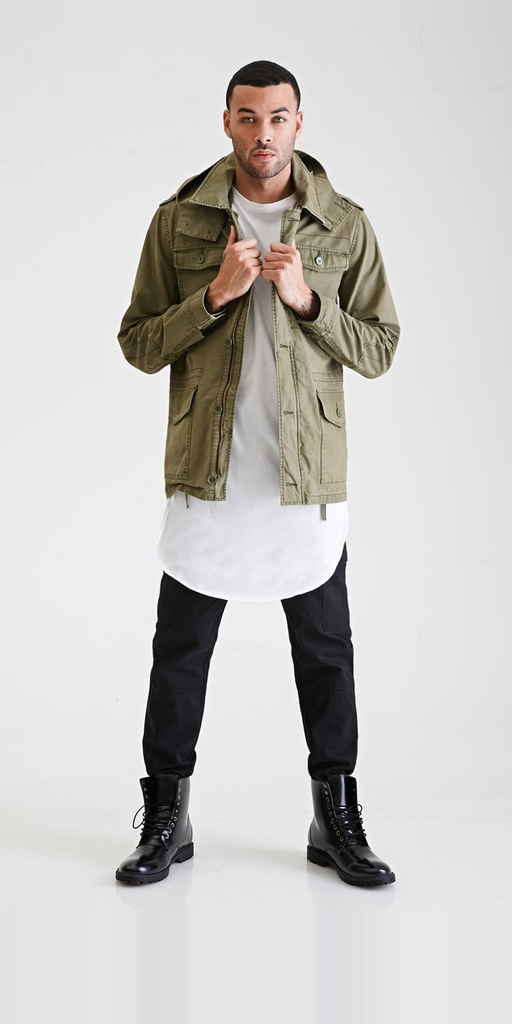

In [39]:
from IPython.display import Image
print(img_testing1)

  

In [42]:
with open("file_test1.txt", "w") as ft1:
  ft1.write(testing_images[0])
!ls

assets				eva3d_aist.py	      options.py
augment.py			eva3d_deepfashion.py  __pycache__
calculate_fid.py		evaluations	      README.md
checkpoint			file_test1.txt	      requirements.txt
ComputerGraphics_Project.ipynb	file_test.txt	      scripts
dataset.py			generation_demo.py    smpl_models
datasets			LICENSE		      smpl_utils.py
distributed.py			losses.py	      torch_utils
dnnlib				model.py	      train_deepfashion.py
download_datasets.py		notebook	      utils.py
download_models.py		op		      volume_renderer.py


/usr/local/lib/python3.9/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image num: 1
smpl num: 1
  0% 0/1 [00:00<?, ?it/s]Marching Cube: 0/5
Marching Cube: 1/5
Marching Cube: 2/5
Marching Cube: 3/5
Marching Cube: 4/5
/usr/local/lib/python3.9/dist-packages/pytorch3d/io/obj_io.py:542: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/usr/local/lib/python3.9/dist-packages/torchvision/utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(
100% 1/1 [00:24<00:00, 24.74s/it]


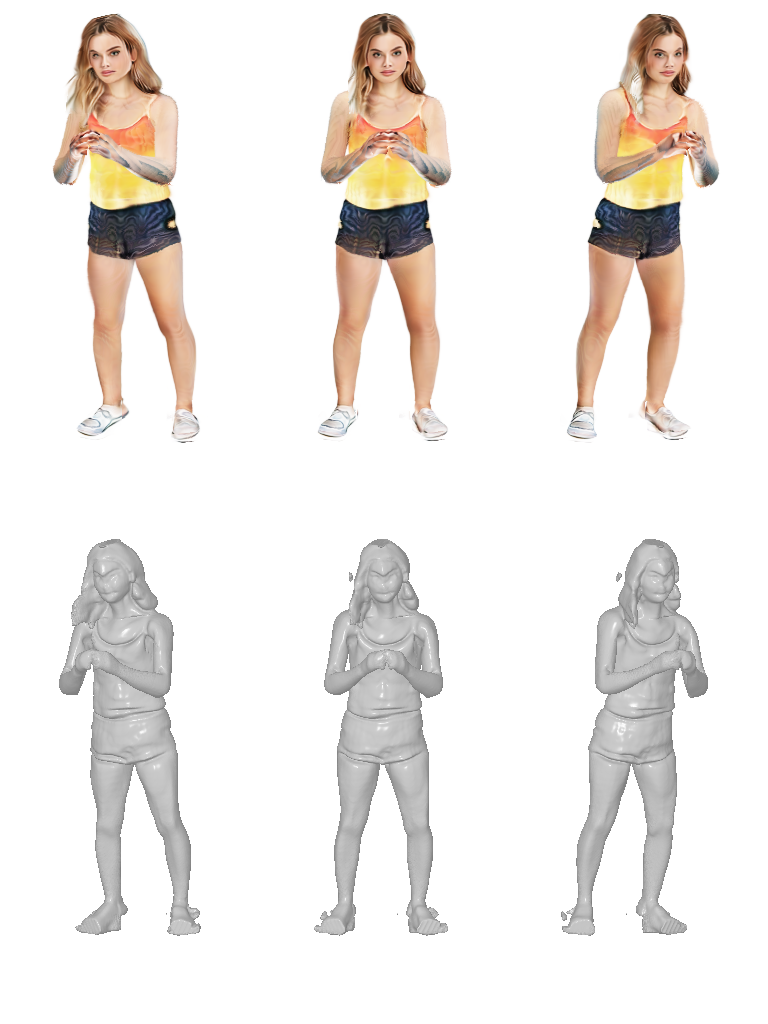

In [44]:

# @title Start the Genenration!
!python generation_demo.py --batch 1 --chunk 1 --expname 512x256_deepfashion --dataset_path /content/EVA3D/datasets/DeepFashion --depth 5 --width 128 --style_dim 128 --renderer_spatial_output_dim 512 256 --input_ch_views 3 --white_bg --voxhuman_name eva3d_deepfashion --deltasdf --N_samples 28 --ckpt 420000 --identities 1 --truncation_ratio 0.5 --testing_list file_test1.txt
from IPython.display import Image
Image('evaluations/512x256_deepfashion/iter_0420000/random_angles/images_paper_fig/0000000.png')

/usr/local/lib/python3.9/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  0% 0/1 [00:00<?, ?it/s]Marching Cube: 0/5
Marching Cube: 1/5
Marching Cube: 2/5
Marching Cube: 3/5
Marching Cube: 4/5
/usr/local/lib/python3.9/dist-packages/pytorch3d/io/obj_io.py:542: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/usr/local/lib/python3.9/dist-packages/torchvision/utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(
100% 1/1 [00:27<00:00, 27.08s/it]


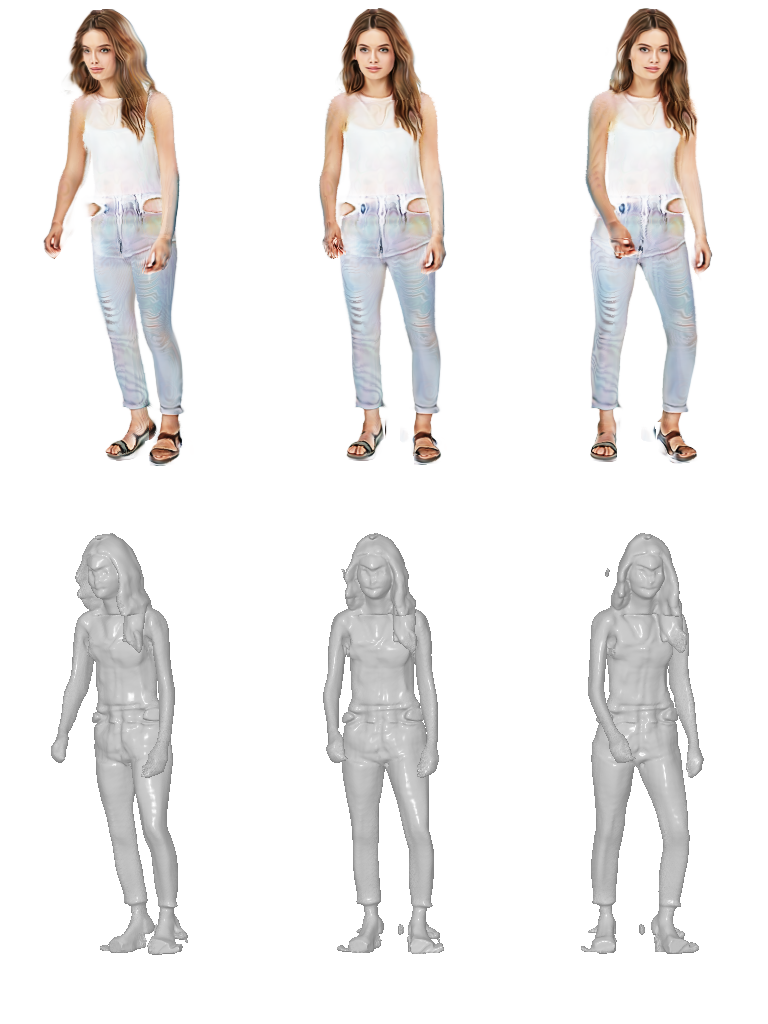

In [12]:

# @title Start the Genenration!
!python generation_demo.py --batch 1 --chunk 1 --expname 512x256_deepfashion --dataset_path demodataset --depth 5 --width 128 --style_dim 128 --renderer_spatial_output_dim 512 256 --input_ch_views 3 --white_bg --voxhuman_name eva3d_deepfashion --deltasdf --N_samples 28 --ckpt 420000 --identities 1 --truncation_ratio 0.5
from IPython.display import Image
Image('evaluations/512x256_deepfashion/iter_0420000/random_angles/images_paper_fig/0000000.png')

In [ ]:
# @title Train a new model using deepfashion dataset
!python train_deepfashion.py --batch 8 --chunk 1 --expname train_deepfashion_512x256 --dataset_path datasets/DeepFashion --depth 5 --width 128 --style_dim 128 --renderer_spatial_output_dim 512 256 --input_ch_views 3 --white_bg --r1 300 --voxhuman_name eva3d_deepfashion --random_flip --eikonal_lambda 0.5 --small_aug --iter 1000 --adjust_gamma --gamma_lb 20 --min_surf_lambda 1.5 --deltasdf --gaussian_weighted_sampler --sampler_std 15 --N_samples 14


image num: 8037
smpl num: 8037
  0% 0/1000 [00:00<?, ?it/s]Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
d: 1.3860; g: 0.6333; r1: 300.0 0.0000; eik: 0.2846; surf: 0.0022; augp: 0.6000; beta: 0.1000:   0% 0/1000 [00:16<?, ?it/s]Successfully saved checkpoint for iteration 0.
d: 1.0797; g: 0.9187; r1: 300.0 0.0068; eik: 0.1605; surf: 0.0023; augp: 0.6000; beta: 0.0997:   1% 12/1000 [03:16<4:29:43, 16.38s/it]